<a href="https://colab.research.google.com/github/YuliyaCarvalho/Portugal_Property_Listings/blob/main/Portugal_Property_Listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate Market Analysis - Portugal 🏘
## A Comprehensive Dataset on Real Estate Asking Prices and Property Features

#### This is an exploratory data analysis of real estate listings across Portugal, examining property features, pricing patterns, and geographic distributions. This project analyzes asking prices and property characteristics to uncover insights about the Portuguese housing market.

#### **Source:** https://www.kaggle.com/datasets/luvathoms/portugal-real-estate-2024/data?select=portugal_listinigs.csv

#### **Posted by:** [Thomas Gaehtgens](https://www.kaggle.com/luvathoms)
#### **License:** Released under MIT License
Copyright (c) 2013 Mark Otto. <br>
Copyright (c) 2017 Andrew Fong.

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### About Dataset
**Portuguese Real Estate Listings:**  
This weekly updated dataset contains the more than 100k real asking prices for real estate properties listed on Portuguese real estate websites. The data was legally and ethically scraped from several online platforms, ensuring compliance with the platforms' terms and conditions.


**Temporal Coverage:** 04/09/2018 -> 11/17/2024 (official max: 2025-01-28 19:07:18)

The dataset includes detailed information about each property listing, such as:

| Column                | Data Type | Description                                                     |
| --------------------- | --------- | --------------------------------------------------------------- |
| Price                 | float64   | Asking price of the property in Euros                           |
| District              | object    | Geographical region (district) of the property                  |
| City                  | object    | City where the property is located                              |
| Town                  | object    | Town or parish of the property                                  |
| Type                  | object    | Property type (e.g., Apartment, House, Garage, Land)            |
| EnergyCertificate     | object    | Energy efficiency certificate according to Portuguese standards |
| GrossArea             | float64   | Gross private area of the property (m2)                         |
| TotalArea             | float64   | Total area of the property, including non-living spaces (m2)    |
| Parking               | float64   | Number of parking spaces available                              |
| HasParking            | object    | Indicates if the property has parking available (Yes/No)        |
| Floor                 | object    | Floor number where the property is located                      |
| ConstructionYear      | float64   | Year the property was built                                     |
| EnergyEfficiencyLevel | object    | Detailed energy efficiency level                                |
| PublishDate           | object    | Date when the property listing was published                    |
| Garage                | object    | Indicates presence of a garage (Yes/No)                         |
| Elevator              | object    | Indicates whether the property has an elevator                  |
| ElectricCarsCharging  | object    | Indicates availability of an electric car charging station      |
| TotalRooms            | float64   | Total number of rooms in the property                           |
| NumberOfBedrooms      | float64   | Number of bedrooms                                              |
| NumberOfWC            | float64   | Number of water closets (toilets)                               |
| ConservationStatus    | object    | Current condition or conservation status of the property        |
| LivingArea            | float64   | Actual livable space inside the property (m2)                   |
| LotSize               | float64   | Size of the land associated with the property (m2)              |
| BuiltArea             | float64   | Total constructed area of the property (m2)                     |
| NumberOfBathrooms     | float64   | Number of bathrooms                                             |


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Loading the dataset into a Pandas DataFrame:

url = 'https://raw.githubusercontent.com/YuliyaCarvalho/Portugal_Property_Listings/refs/heads/main/data/portugal_listinigs.csv'
df = pd.read_csv(url)

# For better readibility, I will convert the column names from CamelCase to snake_case:
import re

def to_snake_case(name):
    # Insert underscore before uppercase letters
    name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)
    return name.lower()

df.columns = [to_snake_case(col) for col in df.columns]

df.info()
display(df.head())

print(f"Dataset shape: {df.shape}")

/tmp/ipython-input-650614059.py:4: DtypeWarning: Columns (9,10,12,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135536 entries, 0 to 135535
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    135236 non-null  float64
 1   district                 135536 non-null  object 
 2   city                     135536 non-null  object 
 3   town                     135534 non-null  object 
 4   type                     135520 non-null  object 
 5   energy_certificate       135522 non-null  object 
 6   gross_area               27638 non-null   float64
 7   total_area               127153 non-null  float64
 8   parking                  135342 non-null  float64
 9   has_parking              68215 non-null   object 
 10  floor                    27929 non-null   object 
 11  construction_year        88021 non-null   float64
 12  energy_efficiency_level  67289 non-null   object 
 13  publish_date             29239 non-null   object 
 14  gara

,price,district,city,town,type,energy_certificate,gross_area,total_area,parking,has_parking,...,elevator,electric_cars_charging,total_rooms,number_of_bedrooms,number_of_wc,conservation_status,living_area,lot_size,built_area,number_of_bathrooms
0,780000.0,Vila Real,Valpaços,Carrazedo de Montenegro e Curros,Farm,NC,200.0,552450.0,0.0,False,...,False,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,0.0
1,223000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,81.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,81.0,NaN,NaN,2.0
2,228000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,108.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,108.0,NaN,NaN,2.0
3,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,0.0
4,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0


Dataset shape: (135536, 25)


Loaded dataset has a total of 135535 entries, 25 columns. It is clear right away, that lots of columns have a pretty massive amount of missing values.  



In [30]:
# Some of the integer columns are represented as float64 type, I will convert them to Int64:
int_cols = [
    'construction_year',
    'number_of_bedrooms',
    'number_of_bathrooms',
    'number_of_wc',
    'total_rooms',
    'parking']

df[int_cols] = df[int_cols].round().astype('Int64')

# publish_date column is listed as 'object':
df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

In [31]:
# First things first -> checking for duplicate rows:

df.duplicated().sum()

np.int64(9011)

In [32]:
df.groupby(df.columns.tolist(), dropna=False).size().sort_values(ascending=False).head(10)


,,,,,,,,,,,,,,,,,,,,,,,,,0
price,district,city,town,type,energy_certificate,gross_area,total_area,parking,has_parking,floor,construction_year,energy_efficiency_level,publish_date,garage,elevator,electric_cars_charging,total_rooms,number_of_bedrooms,number_of_wc,conservation_status,living_area,lot_size,built_area,number_of_bathrooms,
455000.0,Braga,Braga,Palmeira,House,B-,NaN,420.0,<NA>,True,NaN,<NA>,NaN,NaT,NaN,False,NaN,3,<NA>,<NA>,NaN,415.0,NaN,NaN,4,29
545000.0,Aveiro,Aveiro,Esgueira,House,A+,265.0,322.0,3,True,NaN,2023,NaN,NaT,NaN,False,NaN,4,<NA>,<NA>,NaN,202.0,NaN,NaN,3,28
300000.0,Setúbal,Palmela,Palmela,House,A+,NaN,153.0,0,NaN,NaN,2023,A+,NaT,True,False,False,4,3,1,New,112.0,174.0,153.0,2,18
18000.0,Évora,Reguengos de Monsaraz,Reguengos de Monsaraz,Land,NC,NaN,133.0,1,True,NaN,<NA>,NaN,NaT,NaN,False,NaN,<NA>,<NA>,<NA>,NaN,154.0,NaN,NaN,0,17
245000.0,Viana do Castelo,Viana do Castelo,São Romão de Neiva,Warehouse,NC,261.0,261.0,3,True,NaN,<NA>,NaN,NaT,NaN,False,NaN,<NA>,<NA>,<NA>,NaN,261.0,NaN,NaN,1,17
440000.0,Lisboa,Vila Franca de Xira,Alverca do Ribatejo e Sobralinho,Apartment,NC,NaN,147.0,0,NaN,NaN,2024,NC,NaT,True,True,False,<NA>,3,0,NaN,110.0,NaN,NaN,2,16
335900.0,Porto,Porto,Paranhos,Apartment,NC,NaN,89.0,1,NaN,NaN,<NA>,NC,NaT,False,False,False,<NA>,2,<NA>,NaN,84.0,NaN,NaN,1,15
299000.0,Aveiro,Vagos,Sosa,House,A+,178.0,200.0,1,True,NaN,<NA>,NaN,NaT,NaN,False,NaN,3,<NA>,<NA>,NaN,148.0,NaN,NaN,3,15
565000.0,Aveiro,Aveiro,Esgueira,House,A+,265.0,322.0,3,True,NaN,2023,NaN,NaT,NaN,False,NaN,4,<NA>,<NA>,NaN,202.0,NaN,NaN,3,14


* In the dataset, a total of 9011 duplicate rows were identified (which represents ~6.7% of the entire table), including some property listings, that appear as many as 29 times!   
* As noted by the [dataset author](https://www.kaggle.com/luvathoms), the data was scraped from various Portuguese real estate platforms, and it is clear, that the same property owners often list their properties on multiple platforms.   
* Additionally, properties are frequently re-listed on the same platform, either due to platform time-limits or to improve visibility and appear at the top of search results. These practices explain the high incidence of exactentries in the dataset.

* These exact duplicates do not add any new information, so keeping them would just inflate counts, bias distributions and skew your statistics or machine learning models.

I will drop these rows:

In [33]:
df_before = len(df)
df = df.drop_duplicates()
df_after = len(df)

print(f"Dropped {df_before - df_after} duplicate rows ({(df_before - df_after)/df_before:.2%})")

Dropped 9011 duplicate rows (6.65%)


In [34]:
# checking NULLs:

null_counts = df.isna().sum()
null_percentages = round((df.isna().sum() / len(df)) * 100, 3)

missing_data_df = pd.DataFrame({
    'n_nulls': null_counts,
    'pct_nulls': null_percentages})

missing_data_df = missing_data_df[missing_data_df['n_nulls'] > 0].sort_values(by='pct_nulls', ascending=False)
display(missing_data_df)

,n_nulls,pct_nulls
conservation_status,108501,85.755
built_area,101722,80.397
gross_area,100511,79.440
floor,100426,79.372
publish_date,99041,78.278
lot_size,89704,70.898
number_of_bedrooms,82745,65.398
number_of_wc,73345,57.969
electric_cars_charging,63912,50.513
energy_efficiency_level,63912,50.513


In [35]:
print(f"This dataset's temporal coverage is: {df['publish_date'].min()} - {df['publish_date'].max()}")

This dataset's temporal coverage is: 2018-04-09 05:48:21.907000 - 2025-01-28 19:07:18.900000


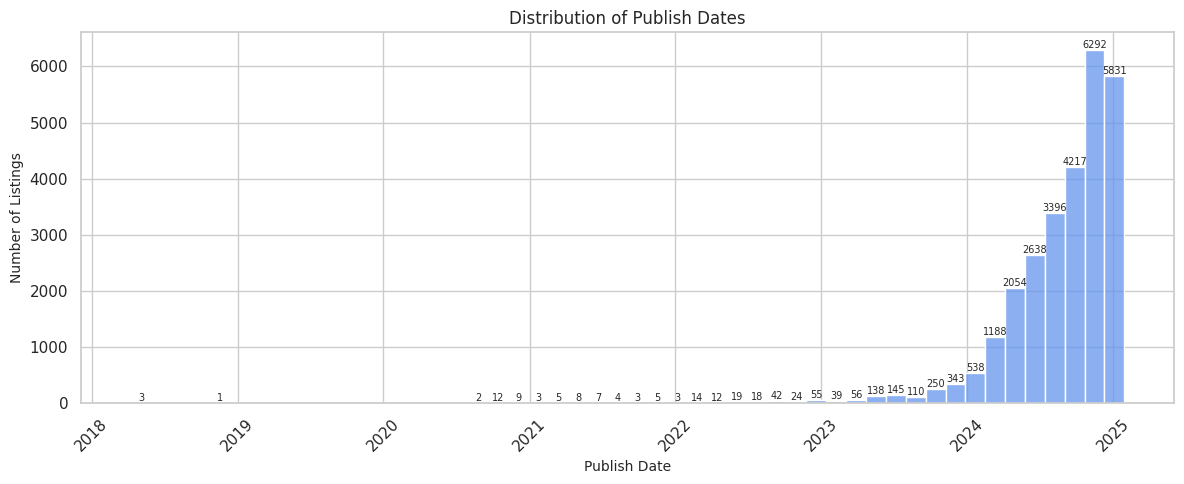

In [36]:
# Distribution of listings by 'publish_date':

plt.figure(figsize=(12,5))
ax = sns.histplot(df['publish_date'], bins=50, color='cornflowerblue')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height,
               f'{int(height)}',
               ha='center', va='bottom', fontsize=7, rotation=0)

plt.title('Distribution of Publish Dates', fontsize=12)
plt.xlabel('Publish Date', fontsize=10)
plt.ylabel('Number of Listings', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🔹 only 2 columns have zero missing values ➜ `district` and `city`  
🔹 `town` has only 2 missing values ➜ I took a closer look at both of listings (***Santarém, Torres Novas***), they seem like possible duplicates (identical location, total area, price, living area), caused by possible re-listing. I will deal with these 2 later.   
🔹 `price` column seems to be my target variable: one cannot analyze prices without corresponding data. Dropping rows, where `price` is undefined, is a logical step, removing these 283 rows (~0.2%) will have a minimal impact on overall data. However, I will save these listings with missing `price` as a separate dataframe for future price prediction model.  



In [37]:
df_price_null = df[df['price'].isna()].copy()
len(df_price_null)

283

- In this dataset, there is a **high percentage of missing values** in many property attributes, such as number of rooms, bathrooms, area measurements, or construction year. This is largely due to the fact that the data was scraped from multiple Portuguese real estate platforms, each with different fields to fill in.   
- As a result, the same property may appear multiple times with only partial information in each record.   
- In order to address this, I want to pinpoint and flag these near-duplicate listings based on `district`, `city`, `town`, `price`, ignoring other columns with high variability or missingness. This approach will allow me to identify repeated listings without being misled by inconsistent or sparse feature entries.

| **Field / Attribute**           |        **Idealista**        | **Imovirtual** | **Casa Sapo** |  **OLX Imobiliário** |    **CustoJusto**    |
| ------------------------------- | :-------------------------: | :------------: | :-----------: | :------------------: | :------------------: |
| **Price**                       |           Required          |    Required    |    Required   |       Required       |       Required       |
| **Sale / Rent**                 |              ✔              |        ✔       |       ✔       |           ✔          |           ✔          |
| **District**                    |           Required          |    Required    |    Required   |       Optional       |       Optional       |
| **City / Town**                 |           Required          |    Required    |    Required   |       Optional       |       Optional       |
| **Freguesia / Parish**          |           Optional          |    Optional    |    Optional   |       Free text      |       Free text      |
| **Neighborhood / Zone**         |           Optional          |    Optional    |    Optional   |       Free text      |       Free text      |
| **Property Type**               |           Required          |    Required    |    Required   |       Optional       |       Optional       |
| **Total Area**                  |           Optional          |    Optional    |    Optional   | Optional / Free text | Optional / Free text |
| **Usable Area (Area útil)**     |           Optional          |    Optional    |    Optional   |       Optional       |       Optional       |
| **Gross Area (Area bruta)**     |           Optional          |    Optional    |    Optional   |       Optional       |       Optional       |
| **Number of Rooms**             |           Optional          |    Optional    |    Optional   |       Optional       |       Optional       |
| **Number of Bathrooms**         |           Optional          |    Optional    |    Optional   |       Optional       |       Optional       |
| **Construction Year**           |           Optional          |    Optional    |    Optional   |         Rare         |         Rare         |
| **Energy Certificate**          |           Optional          |    Optional    |    Optional   |         Rare         |         Rare         |
| **Parking / Garage**            |           Optional          |    Optional    |    Optional   |       Optional       |       Optional       |
| **Elevator**                    |           Optional          |    Optional    |    Optional   |          No          |          No          |
| **Garden / Terrace**            |           Optional          |    Optional    |    Optional   |          No          |          No          |
| **Furnished**                   |           Optional          |    Optional    |    Optional   |       Optional       |       Optional       |
| **Description / Free Text**     |              ✔              |        ✔       |       ✔       |           ✔          |           ✔          |
| **Photos**                      | Optional (often encouraged) |    Optional    |    Optional   |       Optional       |       Optional       |
| **Video / Virtual Tour**        |           Optional          |    Optional    |    Optional   |          No          |          No          |
| **Contact Info**                |              ✔              |        ✔       |       ✔       |           ✔          |           ✔          |
| **Reference Code / Listing ID** |              ✔              |        ✔       |       ✔       |       Optional       |       Optional       |

I will create a boolean flag column `near_duplicate`, that will flag eash listing as `near_duplicate` = 1, when all of the following columns are identical:   
- 1. `district`  
- 2. `city`  
- 3. `town`  
- 4. `price`  
- 5. `type`  
- 6. `construction_year`  
- 7. `energy_certificate`  
- 8. `total_area`  
- 9. `living_area`
- 10. `number_of_bathrooms`
- 11. `number_of_bedrooms`    
- 12. `parking`
- 13. `total_rooms`   
- 14. `lot_size`  and   
- 15. `living_area`
<br>

I believe my conservative 15-column methodology approach is strict and appropriate:

In [38]:
subset_cols = ['district', 'city', 'town', 'price', 'type', 'construction_year', 'energy_certificate', 'total_area', 'living_area', 'number_of_bathrooms', 'number_of_bedrooms', 'parking', 'total_rooms', 'lot_size', 'living_area']

df['duplicate_group'] = df[subset_cols].astype(str).agg('|'.join, axis=1)
df['near_duplicate'] = df.duplicated(subset=subset_cols, keep=False).astype(int)

duplicates_df = (df[df['near_duplicate'] == 1].sort_values('duplicate_group'))

print(f"Total near-duplicate rows: {len(duplicates_df)}")
duplicates_df.head(20)

Total near-duplicate rows: 8347


,price,district,city,town,type,energy_certificate,gross_area,total_area,parking,has_parking,...,total_rooms,number_of_bedrooms,number_of_wc,conservation_status,living_area,lot_size,built_area,number_of_bathrooms,duplicate_group,near_duplicate
70289,195000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Land,NC,NaN,NaN,0,NaN,...,<NA>,<NA>,0,NaN,NaN,337.0,NaN,0,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,1
70288,195000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Land,NC,NaN,NaN,0,NaN,...,<NA>,<NA>,0,NaN,NaN,337.0,NaN,0,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,1
16649,360000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,A,NaN,170.0,1,True,...,3,<NA>,<NA>,NaN,140.0,NaN,NaN,0,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,1
16651,360000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,A,NaN,170.0,1,True,...,3,<NA>,<NA>,NaN,140.0,NaN,NaN,0,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,1
16650,360000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,A,NaN,170.0,1,True,...,3,<NA>,<NA>,NaN,140.0,NaN,NaN,0,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,1
68793,72000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Other - Residential,NC,NaN,66.0,0,NaN,...,<NA>,<NA>,0,NaN,NaN,NaN,NaN,0,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,1
62710,72000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Other - Residential,NC,NaN,66.0,0,False,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,0,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,1
68600,99000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Transfer of lease,C,NaN,189.0,0,NaN,...,<NA>,<NA>,0,NaN,NaN,NaN,NaN,0,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,1
62667,99000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Transfer of lease,C,NaN,189.0,0,False,...,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,0,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,1
133749,42000.0,Aveiro,Albergaria-a-Velha,Branca,Land,NC,NaN,NaN,0,NaN,...,<NA>,<NA>,0,NaN,NaN,550.0,550.0,0,Aveiro|Albergaria-a-Velha|Branca|42000.0|Land|...,1


In [50]:
near_dupes_df = df[df['near_duplicate'] == 1]
near_dupes_df['duplicate_group'].nunique()

3426

I have flagged more than 8K of quite strict near-duplicate listings, based on identical values in 15 columns.
There are 3426 duplicate groups in total

I looked through some of them, and with a high confiendence I am going to drop duplicates, leaving only 1 listing per group.

In [52]:
# Keeping only 1 row per duplicate group:
rows_to_keep = df.drop_duplicates(subset='duplicate_group', keep='first')

df_strict_deduped = rows_to_keep.copy()
print(f"Original df rows: {len(df)}")
print(f"Strict deduped df rows: {len(df_strict_deduped)}")
print(f"Dropped {len(df) - len(df_strict_deduped)} ")

Original df rows: 126525
Strict deduped df rows: 121604
Dropped 4921 


#### **Summary:**
I have successfully identified and removed 4921 near-duplicate listings using a conservative 15-column matching strategy, reducing dataset from 126525 to 121604 rows (3.89% reduction).

- Total near-duplicates found: 8347 rows, 6.6% of dataset (flagged across all duplicates)  
- Unique duplicate groups: 3426 groups  
- Average group size: ~2.44 listings per group  
- Rows removed: 4921 (kept first occurrence of each group)  
- Rows retained: 3426 from duplicate groups (first occurrence kept)

In [53]:
df_strict_deduped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121604 entries, 0 to 135534
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   price                    121345 non-null  float64       
 1   district                 121604 non-null  object        
 2   city                     121604 non-null  object        
 3   town                     121602 non-null  object        
 4   type                     121589 non-null  object        
 5   energy_certificate       121591 non-null  object        
 6   gross_area               25638 non-null   float64       
 7   total_area               114027 non-null  float64       
 8   parking                  121460 non-null  Int64         
 9   has_parking              63303 non-null   object        
 10  floor                    25551 non-null   object        
 11  construction_year        81154 non-null   Int64         
 12  energy_efficiency_lev

In [54]:
df_strict_deduped['duplicate_group'].nunique()

121604

In [56]:
# Order by multiple columns and print first 50 rows
df_strict_deduped.sort_values(
    by=['district', 'city', 'town', 'type', 'price', 'living_area']).head(50)


,price,district,city,town,type,energy_certificate,gross_area,total_area,parking,has_parking,...,number_of_bedrooms,number_of_wc,conservation_status,living_area,lot_size,built_area,number_of_bathrooms,duplicate_group,near_duplicate,group
68247,98000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,F,NaN,81.0,0,NaN,...,2,0,NaN,81.0,NaN,96.40,1,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,0,residential
68485,99900.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,D,NaN,46.0,0,NaN,...,1,0,Good condition,46.0,NaN,18.50,1,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,0,residential
64992,110000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,D,18.0,46.0,1,True,...,<NA>,<NA>,NaN,46.0,NaN,NaN,1,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,0,residential
15071,115000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,F,NaN,95.0,0,False,...,<NA>,<NA>,NaN,95.0,NaN,NaN,1,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,0,residential
57971,119000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,D,136.0,99.0,0,False,...,<NA>,<NA>,NaN,136.0,NaN,NaN,1,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,0,residential
123077,119900.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,F,NaN,96.0,0,NaN,...,2,0,Used,89.0,NaN,112.60,1,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,0,residential
116170,127500.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,D,NaN,57.0,0,NaN,...,1,<NA>,Good condition,73.0,NaN,NaN,1,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,0,residential
49146,130000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,D,112.0,85.0,1,True,...,<NA>,<NA>,NaN,85.0,NaN,NaN,1,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,0,residential
16323,130000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,C,NaN,92.0,1,True,...,<NA>,<NA>,NaN,121.0,NaN,NaN,1,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,0,residential
62702,140000.0,Aveiro,Albergaria-a-Velha,Albergaria-a-Velha e Valmaior,Apartment,D,123.0,92.0,1,True,...,<NA>,<NA>,NaN,92.0,NaN,NaN,1,Aveiro|Albergaria-a-Velha|Albergaria-a-Velha e...,0,residential


I am going to drop the following columns, as they have too much missing data to be reliable:   
`conservation_status` ➡︎ ~86% of missing data  
`built_area` ➡︎ ~80% of missing data  
`gross_area` ➡︎ ~80% of missing data  
`floor` ➡︎ ~79% of missing data  

Unfortunately, the `publish_date` column contains ~78% missing values, making it unreliable for temporal analysis. This is particularly disappointing given the recent surge in Portuguese real estate prices, where tracking listing trends and price changes over time would provide valuable market insights.
With only 21.6% of the data containing publication dates, any time-series analysis would be severely biased and potentially misleading. I would have to pivot from **time-series analysis** to **cross-sectional analysis**.

I will keep `publish_date` column for now, as it might be still useful in the initial dataset exploration, but I will later drop it.

In [39]:
#columns_to_drop = ['conservation_status', 'built_area', 'gross_area', 'floor']
#df = df.drop(columns = columns_to_drop)

`lot_size` column has 71% of missing information. In order to decide, whether missing pattern relates to the property type, I need to explore `type` column (not relevant for apartments, is relevant for private houses)  

I will start cleaning + EDA for each columns, one by one, starting from the 1st one - `price`

In [40]:
#df = df.dropna(subset=['price'])
#df['price'].isna().sum()

In [41]:
df['price'].describe()

,price
count,1.262420e+05
mean,3.707856e+05
std,3.935295e+06
min,1.000000e+00
25%,8.500000e+04
50%,2.100000e+05
75%,3.900000e+05
max,1.380000e+09


Output shows, that price data has serious outliers + data quality issues:
- Mean (€210K) > Median (~ €370K) -> strong right skew  
- Unrealistic values, like **min price** = 1 (data error) and **max price** = €1.38 billion (extremely unlikely)  
- Huge STD = 3.93 million

Raw `price` is not usable and needs cleaning

In [42]:
df['price'].quantile([0.001, 0.005, 0.01, 0.99, 0.995, 0.999])

,price
0.001,1500.00
0.005,3300.00
0.010,5999.41
0.990,2750000.00
0.995,3650000.00
0.999,7497758.70


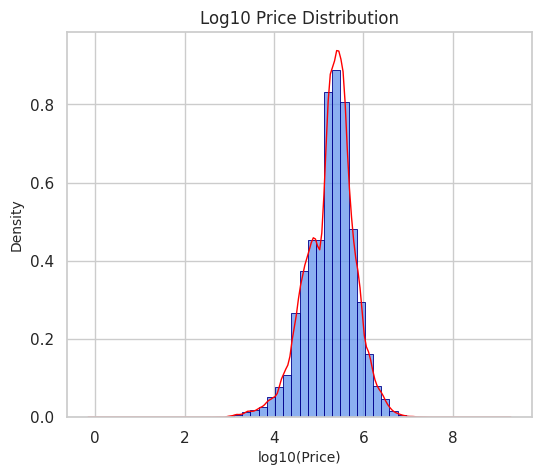

In [43]:
plt.figure(figsize=(6,5))

sns.histplot(np.log10(df['price']), color='cornflowerblue', edgecolor="darkblue", bins = 50, stat = 'density')

sns.kdeplot(np.log10(df['price']), color = 'red', linewidth = 1)

plt.title('Log10 Price Distribution', fontsize = 12)
plt.xlabel('log10(Price)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.show()


In order to better understand price distribution (since there are different property types), it makes sense to look at price distribution per property type. I will group listings based on property type (`type`) column.

In [44]:
print(df['type'].nunique())
df['type'].unique()

21


array(['Farm', 'Apartment', 'Building', 'Land', 'House', 'Store',
       'Other - Residential', 'Garage', 'Transfer of lease',
       'Other - Commercial', 'Warehouse', 'Duplex', 'Investment', 'Hotel',
       'Office', 'Storage', 'Industrial', 'Estate', 'Mansion', nan,
       'Studio', 'Manor'], dtype=object)

In [45]:
residential = {'Apartment', 'House', 'Duplex', 'Studio', 'Mansion', 'Manor', 'Estate', 'Other - Residential'}
commercial = {'Store', 'Office', 'Hotel', 'Building', 'Warehouse', 'Industrial', 'Other - Commercial', 'Investment', 'Transfer of lease'}
low_value_assets = {'Garage', 'Storage'}
land_agriculture = {'Land', 'Farm'}
unknown = {'nan'}

def assign_group(x):
  if pd.isna(x):
    return "unknown"
  elif x in residential:
    return "residential"
  elif x in commercial:
    return "commercial"
  elif x in low_value_assets:
    return 'low_value_asset'
  elif x in land_agriculture:
    return 'land_agriculture'
  else:
    return 'unknown'

df['group'] = df['type'].apply(assign_group)

In [46]:
df.groupby('group')['price'].describe()[['count','min','25%','50%','75%','max']]

,count,min,25%,50%,75%,max
group,,,,,,
commercial,12590.0,300.0,85000.0,185000.0,480000.0,3.600000e+07
land_agriculture,33213.0,300.0,36500.0,69900.0,164000.0,2.000000e+07
low_value_asset,1051.0,100.0,13000.0,24000.0,39900.0,9.500000e+05
residential,79373.0,1.0,166000.0,270000.0,440000.0,1.380000e+09
unknown,15.0,19500.0,60000.0,135000.0,201250.0,6.650000e+05


🔹**residential** group has extreme outliers (min = €1, max = €1.38 billion ➜ impossible values). This groups forms the largest segment (~59% of all listings)  
🔹**low_value_asset** group has suspiciously high values (max = €9.5M ➜ likely misclassified residential or commercial listing)  
🔹**land_agriculture** min = €300 ➜ likely a placeholder, max of 20M ➜ could be a legitimate value for large estates. Second largest segment with ~25% of all listings  
🔹**commercial**: min of €300 ➜ likely a placeholder  
🔹**unknown** has only 15 listings, so it is not a big issue  


ValueError: Could not interpret value `log_price` for `x`. An entry with this name does not appear in `data`.

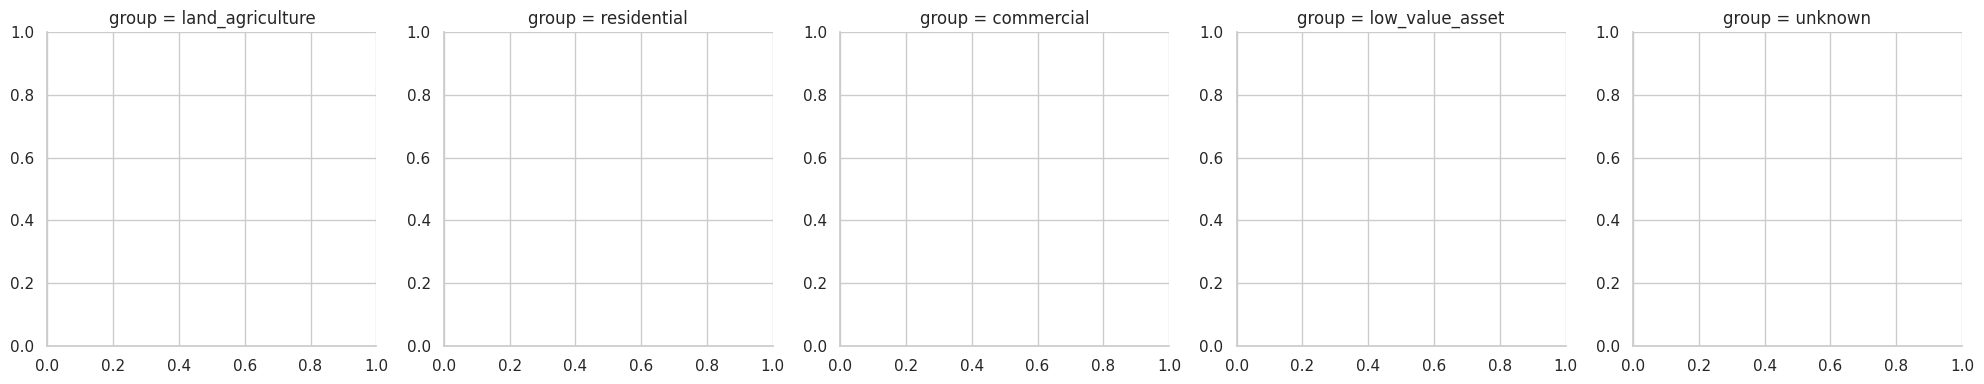

In [47]:
sns.set(style = "whitegrid")
g = sns.FacetGrid(df, col = "group", sharex = False, sharey = False, height = 4)

g.map_dataframe(sns.histplot, x = "log_price", bins = 50, color = "cornflowerblue", edgecolor = "darkblue", stat='density')
g.map_dataframe(sns.kdeplot, x = "log_price", color = "red", linewidth = 1)

g.set_axis_labels("Log10 Price (€)", "Density", fontsize = 8)
g.set_titles(col_template="{col_name}", fontsize = 10)
plt.subplots_adjust(top = 0.8)
g.fig.suptitle("Price Distribution by Property Group (log10 scale)", fontsize = 12)

for ax in g.axes.flat:
    ax.tick_params(axis = 'both', labelsize = 6)

plt.show()

- **Residential** properties show an approximately normal distribution centered around log10(5.4) (around €250K), with most listings concentrated between log10(5.0-5.8) (€100K-€630K)  
- **Commercial** properties show a wider, flatter distribution centered around log10(5-5.5) (~€316K), with considerable spread from log10(4.5-6.5) (€32K-€3.2M), indicating high price variability in this segment    
- **Land and agricultural** properties display a tight, nearly normal distribution centered around log10(4.8) (~€63K), showing more price homogeneity than other categories  
- **Low-value assets** exhibit a concentrated, peaked distribution centered around log10(5.0) (~€100K), with most properties clustered between log10(4.5-5.5) (€32K-€316K), suggesting relatively standardized pricing  

In [ ]:
# Looking closer at extreme outliers of "residential" group:
residential = df[df['group'] == 'residential'].copy()

print(f"Total residential properties: {len(residential)}")
print(f"Price range: €{residential['price'].min():.2f} to €{residential['price'].max():.2f}")

# Extreme high prices (top 0.5%):
p995 = residential['price'].quantile(0.995)
print(f"99.5th percentile: €{p995:.0f}")

extreme_high = residential[residential['price'] > p995].sort_values('price', ascending=False)

print(f"Properties above 99.5th percentile: {len(extreme_high)}")
print()
print("Residential - extreme high price outliers:")
print()

pd.set_option('display.max_rows', None)  # This is the key one!
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.expand_frame_repr', False)
print(extreme_high)

# Summary stats of outliers:
print("\nOutlier summary statistics:")
print()
print(extreme_high[['price', 'living_area', 'total_area', 'number_of_bedrooms', 'number_of_bathrooms', 'construction_year']].describe())

In [ ]:
# Checking geographic distribution of those 397 luxury properties:

district_city_table = extreme_high.groupby(['district', 'city']).size().to_frame(name='count')
district_city_table['percentage'] = (district_city_table['count'] / len(extreme_high) * 100).round(2)
district_city_table = district_city_table.sort_values('count', ascending=False)

print("Luxury properties distribution by district/city:\n")
print(district_city_table)
print()
print(f"Total properties: {len(extreme_high)}\n")

print("\nDistrict summary:\n")
district_totals = extreme_high['district'].value_counts()
district_pct = (district_totals / len(extreme_high) * 100).round(1)
for district in district_totals.index[:10]:
    print(f"{district}: {district_totals[district]:1d} properties ({district_pct[district]:.1f}%)")


This output clearly shows the geographic concentration of Portugal's luxury real estate market:
1. **Lisbon (Lisboa) district** dominates with 69.5% of all luxury properties:  
- Cascais alone accounts for 42.8% (170 properties) - the undisputed luxury hub  
- Lisbon city has 17.9% (71 properties) - historic center and prime neighborhoods  
- Sintra with 4.3% (17 properties) - historic palaces and estates  
- Oeiras with 3.0% (12 properties) - coastal premium area

2. **Algarve coast** (Faro district) has 12.3%:
- Loulé (3.8%), Albufeira (2.5%), Portimão, Faro, Lagoa - all coastal resort towns  
- Expected for Portugal's premier beach/golf vacations destination

3. **Setúbal district** has 8.8%:
- Grândola (4.8%) - likely large estates/coastal properties (Comporta area)  
- Almada, Palmela - mix of coastal and rural estates  

4. **Porto district** (minimal presence - 3.3%):
- Despite being Portugal's second city, far fewer ultra-luxury properties  

5. **Interior regions** collectively represent < 6%: Portalegre (1.8%), Alentejo [Évora (1.0%), Beja (0.8%)], Braga (1.0%), Vila Real (0.8%),  Coimbra (0.5%) -> mostly rural estates and historic properties rather than urban luxury  

**This suggests Lisboa/Algarve regions dominate high-end property market**

Now going back to outliers:

In [ ]:
# Looking at €1.38B listing:
billion_listing = df[df['price'] == 1.380000e+09]

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(billion_listing.T)

**The €1.38 billion listing (row 58787):**
- This is clearly a data error - it's a 180m2 house in Faro built in 1983  
- Even luxury properties in Portugal don't reach this price

➜ I will remove this property


In [ ]:
# Dropping this listing:
df = df.drop(58787)
print(f"Dropped unrealistically-expensive listing - row 58787")

**Suspicious listings:**
1. Rows 119935 and 119857 look like potential duplicates with the only difference in `lot_size`: 1471 m2 vs 1261 m2 ➜   
What could it be?:
- Same listing updated with corrected lot_size? or
- Two adjacent properties in the same new development (2024 construction, identical specs)?

This is definitely a duplicate with a data entry error in `lot_size`. It's the same brand new-build (2024 is the temporal coverage end date of this dataset) luxury house in Cascais, entered twice with slightly different lot size measurements. Unfortunately publish_date is not available for both of these listings, so I will remove one of them (119857), keeping 119935 (larger `lot_size` of 1471 m2 - more conservative for luxury property)

In [ ]:
# 1. Potential duplicates:
potential_dupes_1 = df.loc[[119935, 119857]]
print("Potential duplicates:\n")
print(potential_dupes_1.T)

In [ ]:
# Dropping this listing:
df = df.drop(119857)
print(f"Dropped Cascais duplicate listing - row 119857")

In [ ]:
# 2. Potential duplicates:

potential_dupes_2 = df.loc[[51602, 82464]]
print("Potential duplicates:\n")
print(potential_dupes_2.T)

**Suspicious listings:**   
What are the chances, that in the same tiny parish [Porches](https://en.wikipedia.org/wiki/Porches_(Lagoa)) there are 2 near-identical properties, each costing exactly €16.8 million? ➜ essentially ZERO!

2. Rows 51602 and 82464 also look like potential duplicates:
- Row 51602 has `total_area` = 0 and is missing some fields
- Row 82464 more complete data (`total_area`, # of bedrooms and bathrooms)

➜ I will keep only row 82464


In [ ]:
df = df.drop(51602)
print(f"Dropped duplicate row 51602, leaving more complete info-wise listing")

In [ ]:
# Moving on to the next possibly suspicious listing:

print(df.loc[46698].T)

**Suspicious listing:**

- Row 46698: `total_area` = 54880 m2, but `living_area` and `lot_size` are both NaN - likely `lot_size` entered in wrong column.
- Price per m2 is really low ➜ €3.3M / 54880 m2 = €60/m2 ➜ this suggests listed `total_area` is most likely `land_area`, (not building area)
- Property is listed as a 'mansion', but no `parking`, no mention of `bedrooms` or `bathrooms`, no `living_area`, no `lot_size`, no `construction_year`
- Another "red flag" - no energy certificate = NC. In Portugal it is illegal to sell or **even list/advertise** property without a valid energy certification as of [December 2013](https://www.sce.pt/perguntas-frequentes/). There are exceptions, but none seem to fit this particular property, as it is listed as "mansion" - meaning "residential building"

My overall conclusion - this is likely a large plot of land with a building of some sort, where the seller entered the total land area in the `total_area` field instead of the building's living area.

I will drop this listing, as there's too many missing values and data quality issues for a meaningful analysis

In [ ]:
# Dropping a mansion in Porto:

df = df.drop(46698)
print(f"Dropped suspicious mansion in Gondomar - listing (row 46698)")

I recognize, that numerous nearly-identical listings must exist within the high-price outliers (in the entire dataset overall, as well) that require investigation. To identify potential duplicates, I examined the following key columns: `district`, `city`, `town`,`price`, `total_area`, and `construction_year`. In true duplicates, all of these columns (except `price`, if it has changed) would contain completely identical details.


Several factors could explain these apparent duplicates: properties may be re-listed after expiration on real estate platforms, the same property could be advertised by multiple agencies (or listed by owners on various platforms), or listings might be updated with corrected information. However, without complete publishing dates available in the dataset (78% missing), I cannot distinguish between legitimate temporal re-listings and true data quality issues. Therefore, I will carefully examine each potential duplicate pair and if `publish_date` is not available - I will choose to retain a listing with a more complete information available, **acknowledging this approach may inadvertently remove some legitimate separate listings**.

In [ ]:
# Checking potential duplicate listings from extreme high-priced outliers:

outlier_cols = ['district', 'city', 'town', 'price', 'total_area', 'construction_year']
extreme_high_dupes = extreme_high[extreme_high.duplicated(subset=outlier_cols, keep=False)]

print(f"Potential duplicates in extreme outliers: {len(extreme_high_dupes)}\n")
print(extreme_high_dupes)

**There are 62 potential duplicates in high-price outliers:**

1. **€11M Palmela Estate in a small parish of Poceirão e Marateca** (index: 110648 + 32868) - identical 1020 km2 estate, only 1 of listings has a `publish_date`. I will keep a later listing (based on index) with available `publish_date`  

2. **€8.5M Montemor-o-Novo Estate in a tiny parish São Cristóvão**  (51784, 81109) - same 541 m2 estate, area field placement differs. I will keep a later listing (based on index) with available `publish_date`  

3. Portimão House €8.5M (81880, 66692) - Identical 288m² house from 1951, no `publish_date` available.

4. Mafra Property €8M (60169, 90385) - Same 8,850m² property

5. Estrela Apartment €5.75M (44169, 97612) - Same 636m² apartment, parking differs (3 vs 1)

6. Campo Maior Estate €5.7M (44377, 98114) - Massive 2,135,000m² estate

7. Misericórdia Apartment €4.995M (92686, 47098) - Same 353m² new apartment

8. Alandroal Estate €4.9M (81068, 57082) - Enormous 5,660,000m² estate

9. Cascais €4.695M (119935, 119857) - Same pair you analyzed earlier (lot: 1,471 vs 1,261m²)

10. Cascais €4.6M (51209, 91930) - Same 478m² house from 1996

In [ ]:
# Dropping selected extreme-high outlier dupes:

1. Palmela - 32868
. Montemor - 51784

In [ ]:
# Checking extreme low prices:

p005 = residential['price'].quantile(0.005)
print(f"\n0.5th percentile: €{p005:,.2f}")

extreme_low = residential[residential['price'] < p005].sort_values('price')

print(f"\nProperties below 0.5th percentile: {len(extreme_low)}")
print()
print("RESIDENTIAL - EXTREME LOW PRICE OUTLIERS")
print()
print(extreme_low)


There are 21 property types overall. So far I will just leave column **lot_size** as it is, but I will add a flag column **has_lot_size**, which I will use down the line

In [ ]:
df['has_lot_size'] = df['lot_size'].notna().astype(int)

## PLAN

#### Phase 1: Initial Data Assessment

**Understand the data structure**
1. Check first/last rows to see actual values
2. Identify target variable (price) and key features
3. Document data dictionary: what each column represents
4. Check for duplicates (same property listed multiple times)
5. Missing data analysis

**Calculate missing percentages per column**

1. Visualize missing patterns (heatmap)
2. Determine if missing values are random or systematic (e.g., gross_area 80% missing)
3. Decide: drop columns >70% missing, or keep if important?

#### Phase 2: Data Cleaning

**Handle missing values**

price (300 missing): Drop rows - it's your target variable

district/city/town: Very few missing - investigate or drop

type: Fill with mode or "Unknown"

Area columns (gross_area, total_area, living_area, built_area): Analyze relationships - are they redundant? Can one predict another?

parking vs has_parking: Reconcile inconsistencies

construction_year: Keep as-is or impute with median by district

Binary features (garage, elevator, etc.): Fill with "No" or create "Unknown" category

Data type corrections

parking: Convert to integer

construction_year: Convert to integer

Binary columns: Convert to boolean or 0/1

publish_date: Convert to datetime

floor: Clean text values, extract numeric where possible

Data quality checks

Price: Remove outliers or unrealistic values (≤0, extremely high)

Areas: Check for impossible values (negative, too small/large)

construction_year: Validate range (e.g., 1800-2026)

Rooms/bedrooms/bathrooms: Check logical consistency

Energy certificate grades: Standardize format

Feature engineering preparation

Calculate property age from construction_year

Extract year/month from publish_date

Create price per square meter (using most complete area column)

Standardize floor levels (ground, 1st, 2nd, etc.)

Phase 3: Exploratory Data Analysis
Univariate analysis

Price distribution (histogram, boxplot, summary stats)

Property type distribution

Geographic distribution (district/city counts)

Area distributions

Construction year trends

Energy efficiency distribution

Price analysis (target variable)

Price by district (boxplot/violin plot)

Price by city (top 10-15 cities)

Price by property type

Price trends over time (if publish_date available)

Price per m² analysis

Bivariate analysis

Price vs living_area (scatterplot)

Price vs construction_year

Price vs number_of_bedrooms/bathrooms

Price vs energy efficiency

Correlation matrix for numeric features

Price by amenities (parking, garage, elevator)

Geographic analysis

Price distribution by district (you're experienced with this from Olist!)

Most expensive vs cheapest regions

Properties count by location

Average area by district

Property characteristics

Bedrooms vs bathrooms relationship

Area comparison (living vs total vs built)

Property types by district

Amenities by price range

Temporal patterns (if publish_date sufficient)

Listing trends over time

Seasonal patterns

Price changes over time

Phase 4: Advanced Analysis
Segmentation

Identify property segments (luxury, mid-range, affordable)

Compare characteristics across segments

Geographic clustering

Key insights

What drives price most? (feature importance qualitative assessment)

Are there undervalued areas?

Property type patterns by location

Energy efficiency adoption patterns

Phase 5: Documentation
Summary findings

Dataset overview statistics

Key patterns discovered

Data quality notes

Recommendations for modeling (if applicable)

Visualizations for portfolio

5-7 compelling, publication-quality charts

Geographic visualizations (leverage your strengths!)

Clear titles and annotations

This roadmap follows your analytical style from the Olist project while addressing the specific challenges of this real estate dataset (high missing data, geographic focus, multiple area measurements). Start with Phase 1-2, then iterate through Phase 3 as you discover patterns.